# Consumer Shopping Behaviour Analysis & Prediction 

This project analyses consumer shopping behaviour using a dataset containing demographic information (age, gender, location), purchasing patterns (frequency, previous purchases), and contextual factors (category, season, shipping type, discounts, payment method). Together, these variables provide a comprehensive foundation for understanding what drives customer spending.


## Problem Definition 

The objective of this project is to analyse consumer behaviour and build machine learning regression models to predict a customer’s purchase amount (USD) based on their demographics, shopping preferences, and behavioural patterns to help businesses with revenue forecasting, personalised promotions and dynamic pricing strategies. I begin by conducting Exploratory Data Analysis (EDA), follow by performing data visualisation and building machine learning models. Linear Regression (using LASSO selected features) is chosen as the benchmark model, and model performance are evaluated primarily using Root Mean Square Error (RMSE), which penalises more on larger errors. 


### Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("../data/raw/shopping_behavior_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Data Preprocessing 

In [2]:
# Check for missing values 
df.isna().sum() 
# no missing values in this dataset 

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [3]:
### Drop Customer ID as it does not help with prediction 
df = df.drop(columns=["Customer ID"])

In [4]:
### Binary encoding (convert yes/no into 1/0) 
binary_cols = ["Subscription Status", "Discount Applied", "Promo Code Used"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [5]:
### Ordinal encoding 
freq_map = {
    "Bi-Weekly": 8, 
    "Weekly": 4,
    "Fortnightly": 2,
    "Monthly": 1,
    "Every 3 Months": 0.33,
    "Quarterly": 0.33,
    "Annually": 0.083
}
df["Frequency of Purchases"] = df["Frequency of Purchases"].map(freq_map)

In [6]:
### One-hot encoding for other categorical variables 
df_model = pd.get_dummies(
    df,
    columns=["Gender", "Category", "Size", "Color", "Season", "Shipping Type", "Payment Method", "Item Purchased", "Location"],
    drop_first=True # create dummy variables for all categories except one (the baseline category) 
)

### Exploratory Data Analysis (EDA) 

In [7]:
### Size (row, col) of dataset 
df.shape

(3900, 17)

In [8]:
### Summary of col types and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   int64  
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   int64  
 13  Promo Code Used         3900 non-null   int64  
 14  Previous Purchases      3900 non-null   

In [9]:
### Summary statistics for all numerical columns 
df_model.describe()

,Age,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,0.270000,0.430000,0.430000,25.351538,2.203843
std,15.207589,23.685392,0.716223,0.444016,0.495139,0.495139,14.447125,2.657689
min,18.000000,20.000000,2.500000,0.000000,0.000000,0.000000,1.000000,0.083000
25%,31.000000,39.000000,3.100000,0.000000,0.000000,0.000000,13.000000,0.330000
50%,44.000000,60.000000,3.700000,0.000000,0.000000,0.000000,25.000000,1.000000
75%,57.000000,81.000000,4.400000,1.000000,1.000000,1.000000,38.000000,4.000000
max,70.000000,100.000000,5.000000,1.000000,1.000000,1.000000,50.000000,8.000000


#### Distribution of Purchase Amount (USD)¶

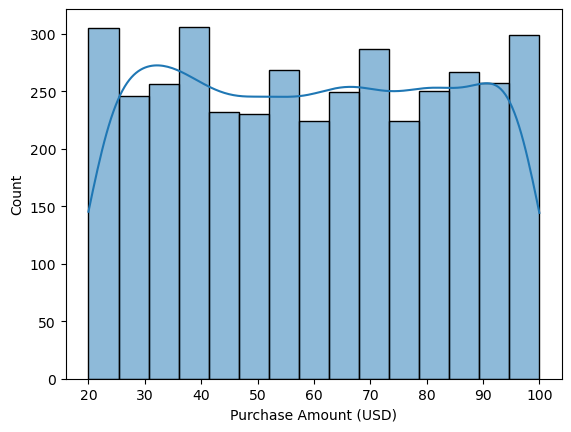

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(df['Purchase Amount (USD)'], kde=True)
plt.show()

From the histogram, purchase amounts appear relatively uniformly distributed, whereby there is no strong preference for low or high spending (no signifant skew), and no obvious outliers. This may suggest a synthetically generated dataset where cutomers' spending is similar across different prices, which tends not to be the case in the real world.


#### Distribution of Location 

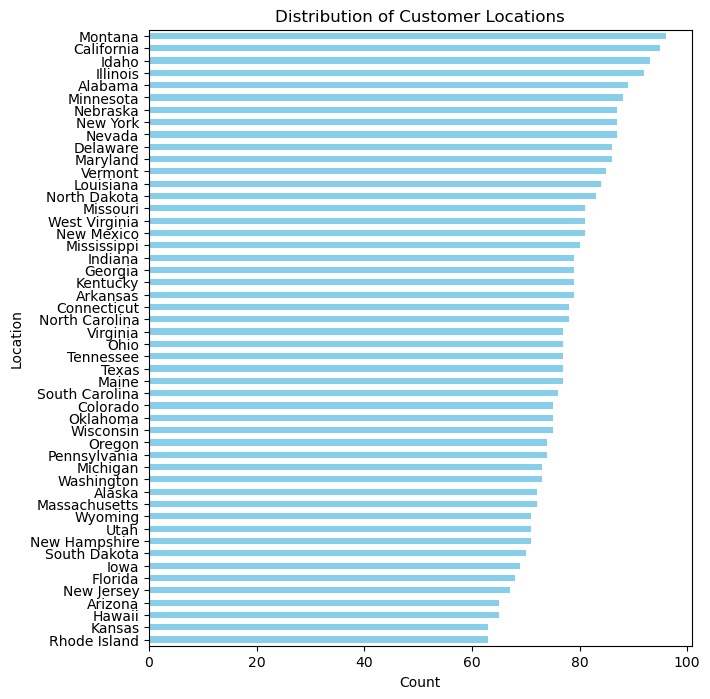

In [11]:
plt.figure(figsize=(7, 8))
df['Location'].value_counts().sort_values().plot(kind='barh', color='skyblue')
plt.title("Distribution of Customer Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

The horizontal bar chart shows roughly same number of customers (70-100) across all states, an unusually even distribution. 

#### Distribution of Subscription Status 

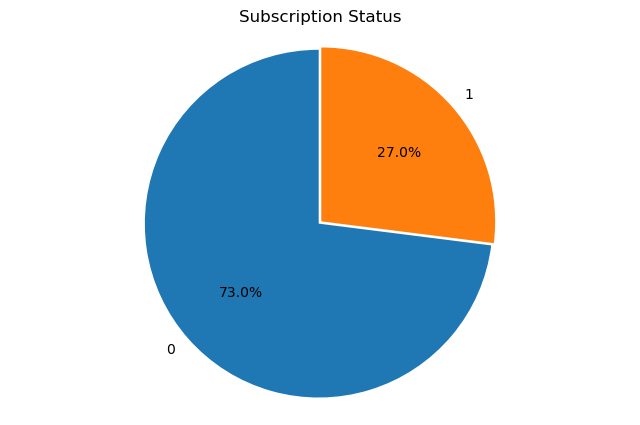

In [12]:
plt.figure(figsize=(8,5))
subs= df['Subscription Status'].value_counts()
plt.pie(subs, explode= (0.01,0.01), labels=subs.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(None))
plt.title('Subscription Status')
plt.axis('equal')
plt.show()

From the pie chart, the majority (73%) of customers are non-subscribers, suggesting that more customers choose to make one-off purchases rather than subscribe to buy long term, or that there may be barriers to adopting subscription. 

### Regression Models 

#### Linear Regression ( Feature selection via Lasso )

In [13]:
## Train-test split (80-20 split) 

from sklearn.model_selection import train_test_split

TARGET_COL = "Purchase Amount (USD)"

X = df_model.drop(columns=[TARGET_COL])
y = df_model[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42
)

X_train.shape, X_test.shape

((3120, 124), (780, 124))

In [14]:
## Choose alpha via Lasso with cross-validation 

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lasso_cv = make_pipeline(
    StandardScaler(),
    LassoCV(
        cv=5,            # 5-fold cross-validation
        random_state=42,
        n_alphas=100     # number of alpha values to try
    )
)

# Train model 
lasso_cv.fit(X_train, y_train)

# Extract the fitted LassoCV model from the pipeline
lasso = lasso_cv.named_steps['lassocv']

# Print best alpha chosen 
print("Best alpha chosen by CV:", lasso.alpha_) 

Best alpha chosen by CV: 0.793601543897066


In [15]:
## Obtain features selected by Lasso 

# Get coefficients corresponding to features in X_train after scaling
coef = lasso.coef_

# Create a table of feature name + coefficient
feature_importance = (
    pd.DataFrame({
        "feature": X.columns,
        "coef": coef
    })
    .sort_values(by="coef", key=lambda s: s.abs(), ascending=False) # sort by absolute value of coefficients
)

# Show top 20 most important features 
feature_importance.head(20)

# Features kept: 
selected_features = feature_importance[feature_importance["coef"] != 0]["feature"].tolist()

print ("Number of selected features:", len(selected_features)) 
print ("Selected features:", selected_features) 


Number of selected features: 9
Selected features: ['Color_Green', 'Location_Alaska', 'Season_Summer', 'Location_Pennsylvania', 'Location_Florida', 'Location_Virginia', 'Location_Maryland', 'Location_Arizona', 'Color_Turquoise']


In [16]:
## Create new (reduced) dataset with only Lasso-selected features 

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

X_train_sel.shape, X_test_sel.shape


((3120, 9), (780, 9))

In [17]:
## Fit Linear Regression on selected features 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_sel, y_train) # y_train already aligns  row-by-row with X_train_sel 

# Predictions 
y_pred = lin_reg.predict(X_test_sel)

# Performance metrics 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression (Lasso feature selection):")
print("RMSE:", round(rmse, 3))
print("R²  :", round(r2, 3))


Linear Regression (Lasso feature selection):
RMSE: 23.899
R²  : -0.021


#### Random Forest Regressor + feature_importances_ to find key features 

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest
rf = RandomForestRegressor(
    n_estimators=300,      # number of trees
    random_state=42,
    max_depth=None,       # allow trees to grow fully
    n_jobs=-1             # use all CPU cores
)

# Fit model 
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [19]:
# Predictions
y_pred_rf = rf.predict(X_test)

# Performance metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", round(rmse_rf, 3))
print("Random Forest R²:", round(r2_rf, 3))

Random Forest RMSE: 23.991
Random Forest R²: -0.029


                       Feature  Importance
0                          Age    0.102927
5           Previous Purchases    0.099673
1                Review Rating    0.086813
6       Frequency of Purchases    0.045386
11                      Size_M    0.013336
7                  Gender_Male    0.012157
12                      Size_S    0.011251
8            Category_Clothing    0.011216
49       Payment Method_PayPal    0.011203
38               Season_Spring    0.010835
40               Season_Winter    0.010806
45  Shipping Type_Store Pickup    0.010372
41       Shipping Type_Express    0.010289
47  Payment Method_Credit Card    0.010269
46         Payment Method_Cash    0.010251
39               Season_Summer    0.010230
44      Shipping Type_Standard    0.010216
50        Payment Method_Venmo    0.010120
48   Payment Method_Debit Card    0.010042
2          Subscription Status    0.009943


/var/folders/mc/d9mx3nks2vd_f_fbf4k8k5qh0000gn/T/ipykernel_3150/2095251772.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(20), x='Importance', y='Feature', palette='viridis')


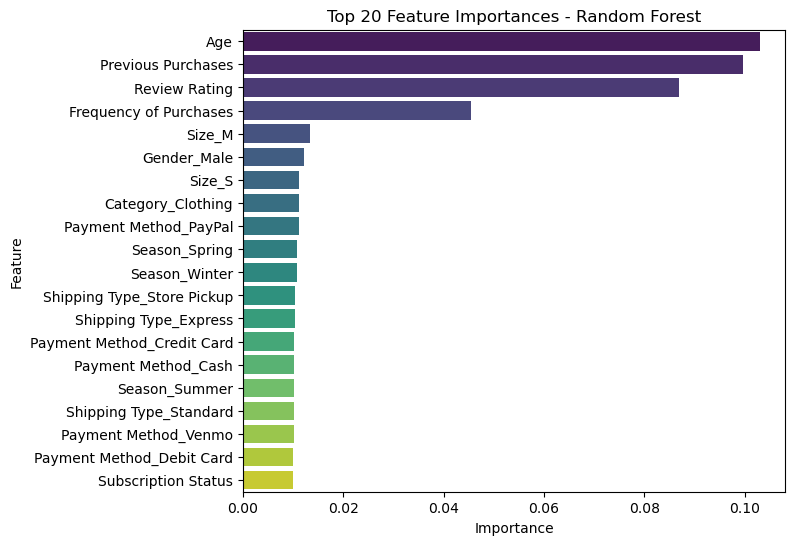

In [20]:
# Feature importance
importances = rf.feature_importances_
feature_names = X_train.columns

# Make a DataFrame for easy sorting
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp.head(20))  # Show top 20 most important features

# Plot feature importance (top 20)
plt.figure(figsize=(7,6))
sns.barplot(data=feat_imp.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances - Random Forest")
plt.show()

This barchart shows the top 20 features the Random Forest used when predicting Purchase Amount (USD). Age, previous purchases and review rating are deemed as top most important features, hence are relied more heavily for prediction. However, all features exhibit relatively low importance values (<0.15), indicating that none of the inputs strongly predict purchase amount, and Random Forest model could be largely capturing noise than meaningful relationship. 

#### XGBoost + gain-based feature importance

In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, r2_score

# Train XBoost
xgb = XGBRegressor(
    n_estimators=300,    #number of trees 
    learning_rate=0.05,    #how much each tree contributes to the final prediction 
    max_depth=6,    #max depth of ind tree
    subsample=0.8,    #introduce randomness
    colsample_bytree=0.8,   #sample 80% of features for each tree
    random_state=42
)

# Fit model 
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [29]:
# Predictions
y_pred_xgb = xgb.predict(X_test)

# Performance metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R²:", r2_xgb)

XGBoost RMSE: 24.28904916236199
XGBoost R²: -0.054282426834106445


                    Feature         Gain
75          Location_Alaska  1600.077026
89          Location_Kansas  1510.335083
52    Item Purchased_Blouse  1463.118896
88            Location_Iowa  1460.121338
114   Location_South Dakota  1454.352905
108           Location_Ohio  1448.785278
101         Location_Nevada  1422.622925
64   Item Purchased_Sandals  1420.597778
82         Location_Florida  1403.018799
60    Item Purchased_Jacket  1374.112671
80     Location_Connecticut  1370.454224
77        Location_Arkansas  1352.033691
93        Location_Maryland  1337.993286
111   Location_Pennsylvania  1336.505005
55     Item Purchased_Dress  1320.518555
94   Location_Massachusetts  1305.091309
15               Color_Blue  1301.981934
97     Location_Mississippi  1255.671753
76         Location_Arizona  1252.213257
98        Location_Missouri  1249.524414


<Figure size 700x500 with 0 Axes>

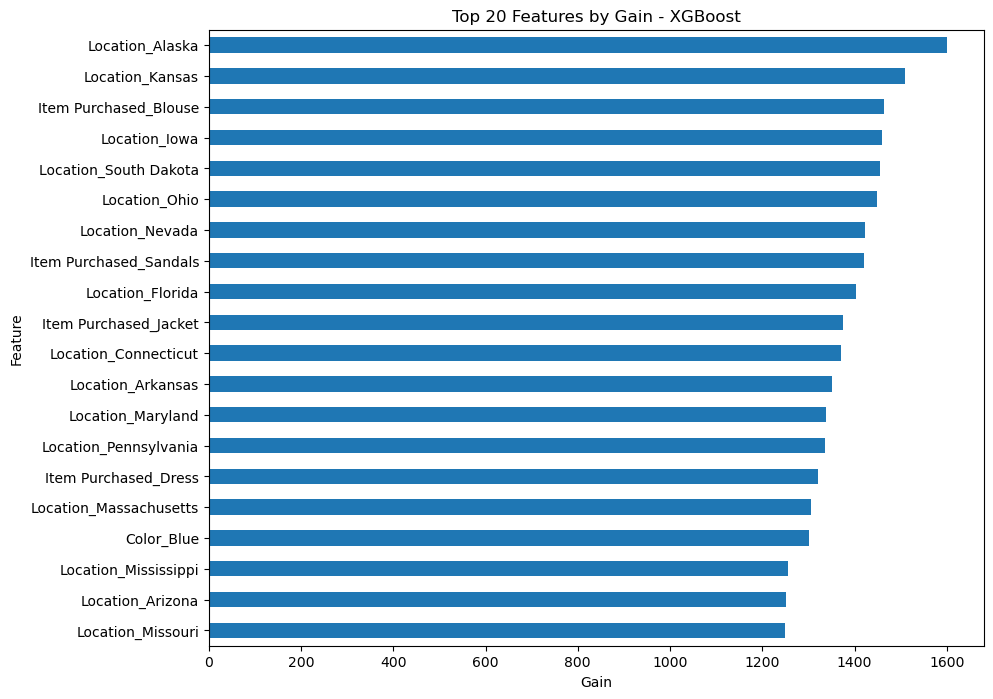

In [27]:
# Get gain-based importance
importance_dict = xgb.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': importance_dict.keys(),
    'Gain': importance_dict.values()
}).sort_values(by='Gain', ascending=False)

print(importance_df.head(20))

plt.figure(figsize=(7,5))
importance_df.head(20).plot(
    kind='barh',
    x='Feature',
    y='Gain',
    legend=False,
    figsize=(10,8)
)
plt.title("Top 20 Features by Gain - XGBoost")
plt.xlabel("Gain")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

The gain-based importance ranking from XGBoost shows that several Location dummy variables and Item Purchased categories appear as the top predictors. However, the gains are relatively close in magnitude, and no feature shows exceptionally high importance. Combined with the earlier EDA results and the poor model performance (negative R²), this indicates that XGBoost is fitting noise rather than detecting meaningful patterns.


### Conclusion 

This project explored consumer behaviour using a Kaggle shopping dataset, with the goal of understanding spending patterns through Exploratory Data Analysis (EDA) and predictive modelling. A complete end-to-end workflow was conducted, including data cleaning, encoding, visualization, and training three machine-learning models: Linear Regression with Lasso, Random Forest Regressor, and XGBoost Regressor.

This dataset does not contain meaningful behavioural patterns and provides no predictive structure for machine-learning models. The uniform distribution of both features and target indicates synthetic generation without real-world complexity. As the dataset lacks predictive signal, no model (linear or tree-based) can accurately predict Purchase Amount. EDA and feature importance analyses confirm the absence of meaningful relationships between the features and the target.